In [1]:
pytest_dir = 'c:\\pytest\\'
data_dir = 'c:\\pytest\\data\\'

In [2]:
%pip install gensim==4.2.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
with open(pytest_dir+'wiki_test.txt','r',encoding='utf-8') as f:
    data=f.read()

In [5]:
import rhinoMorph
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
sent_data = sent_tokenize(data)
rn = rhinoMorph.startRhino()
print('type:', type(sent_data))
print('length:', len(sent_data))
print('sentencesample:', sent_data[:5])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\광주인공지능사관학교\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!
type: <class 'list'>
length: 11977
sentencesample: ['<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">\n지미 카터\n\n제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.', '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.', '조지아 공과대학교를 졸업하였다.', '그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다.', '1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다.']


In [6]:
import os
if not os.path.exists(data_dir+'word2vec'):
    os.mkdir(data_dir+'word2vec')
    print('The word2vec directory is created.')

In [7]:
from tqdm import tqdm
with open(data_dir+'word2vec\\wiki_test_morphed.txt','w',encoding='utf-8') as f:
    for data_each in tqdm(sent_data):
        morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each, pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG', 'MAJ'],xrVv=True,eomi=True)
        joined_data_each = ' '.join(morphed_data_each)
        if joined_data_each:
            f.write(joined_data_each+'\n')
            

100%|██████████| 11977/11977 [00:28<00:00, 413.22it/s]


In [8]:
def read_data(filename, encoding='utf-8'):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split(' ') for line in f.read().splitlines()]
    return data

data = read_data(data_dir+"word2vec/wiki_test_morphed.txt", 'utf-8')
print(len(data))
print(type(data))
print(data[:3])


11972
<class 'list'>
[['URL', '미', '카터', '미', '카터', '제임스', '얼다', '미', '카터', '주니어', '민주당', '출신', '미국', '대통령'], ['미', '카터', '조지아', '섬터', '카운티', '마을', '태어나다'], ['조지아', '공과대학', '교', '졸업하다']]


In [9]:
embedding_dim= 200 

In [10]:
from gensim.models import Word2Vec
os.chdir(data_dir+'word2vec/')

model = Word2Vec(sentences=data, vector_size=embedding_dim, window=10, min_count=5, workers=4, sg=1) # sg=1 skip gram
model.save('embedding_window10_mincnt5_skipgram_200dim.model')
print('Completed.')


Completed.


In [11]:
words=list(model.wv.index_to_key)
with open('embedding_window10_mincnt5_skipgram.txt','w') as f:
    for word in tqdm(words):
        data=model.wv[word].tolist()
        # print('data_pre:',data)
        
        data.insert(0,word)
        # print('data_after:',data)

        for item in data:
            f.write("%s"%item)
        f.write("\n")

100%|██████████| 10645/10645 [00:02<00:00, 3892.30it/s]


In [12]:
model = Word2Vec.load('embedding_window10_mincnt5_skipgram_200dim.model')
print('---유사단어출력---')
similarWords= model.wv.most_similar(positive=['행복', '웃음', '밝다', '기쁨'], topn=5)
print(similarWords)

word = []
for similarWord in similarWords:
    word.append(similarWord[0])
print(word)

---유사단어출력---
[('인사하다', 0.9830942749977112), ('그리스도', 0.9822660088539124), ('맴돌다', 0.9811667799949646), ('행복하다', 0.9793459177017212), ('애꾸눈', 0.9780615568161011)]
['인사하다', '그리스도', '맴돌다', '행복하다', '애꾸눈']


In [13]:
print('---두단어의유사도계산---')
print('한국과일본:',model.wv.similarity('한국','일본'))
print('한국과미국:',model.wv.similarity('한국','미국'))
print('한국과중국:',model.wv.similarity('한국','중국'))


---두단어의유사도계산---
한국과일본: 0.5470293
한국과미국: 0.67642343
한국과중국: 0.68364173


In [14]:
model = Word2Vec.load('embedding_window10_mincnt5_skipgram_big.model')
print('---유사단어출력---')
similarWords= model.wv.most_similar(positive=['행복', '웃음', '밝다', '기쁨'], topn=5)
print(similarWords)

word = []
for similarWord in similarWords:
    word.append(similarWord[0])
print(word)

---유사단어출력---
[('행복하다', 0.7607556581497192), ('기쁘다', 0.7480964064598083), ('즐겁다', 0.7307630181312561), ('흐뭇하다', 0.7170217633247375), ('즐거움', 0.7020072340965271)]
['행복하다', '기쁘다', '즐겁다', '흐뭇하다', '즐거움']


In [15]:
print('---두단어의유사도계산---')
print('한국과일본:',model.wv.similarity('한국','일본'))
print('한국과미국:',model.wv.similarity('한국','미국'))
print('한국과중국:',model.wv.similarity('한국','중국'))


---두단어의유사도계산---
한국과일본: 0.7467086
한국과미국: 0.68534184
한국과중국: 0.5778186


In [16]:
def read_data(filename, encoding='utf-8'):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split(' ') for line in f.read().splitlines()]
    return data

data = read_data(data_dir+"word2vec\\wiki_test_morphed.txt", 'utf-8')
print(len(data))
print(type(data))
print(data[:3])


11972
<class 'list'>
[['URL', '미', '카터', '미', '카터', '제임스', '얼다', '미', '카터', '주니어', '민주당', '출신', '미국', '대통령'], ['미', '카터', '조지아', '섬터', '카운티', '마을', '태어나다'], ['조지아', '공과대학', '교', '졸업하다']]


In [17]:
from gensim.models import FastText
os.chdir(data_dir+'fasttext\\')
model = FastText(sentences=data, vector_size=embedding_dim,
                 window=10, min_count=2, workers=4)
model.save('embedding_window10_mincnt5_fasttext.model')
print('completed')


completed


In [18]:
model = Word2Vec.load('embedding_window10_mincnt5_fasttext.model')
print('---유사단어출력---')
similarWords= model.wv.most_similar(positive=['행복', '웃음', '밝다', '기쁨'], topn=5)
print(similarWords)

word = []
for similarWord in similarWords:
    word.append(similarWord[0])
print(word)

---유사단어출력---
[('일깨우다', 0.9997905492782593), ('가르치다', 0.9997891783714294), ('드리우다', 0.9997690320014954), ('해치우다', 0.9997656941413879), ('치우치다', 0.9997636079788208)]
['일깨우다', '가르치다', '드리우다', '해치우다', '치우치다']


In [19]:
print('---두단어의유사도계산---')
print('한국과일본:',model.wv.similarity('한국','일본'))
print('한국과미국:',model.wv.similarity('한국','미국'))
print('한국과중국:',model.wv.similarity('한국','중국'))


---두단어의유사도계산---
한국과일본: 0.9790179
한국과미국: 0.9252809
한국과중국: 0.9888541


In [20]:
from gensim.models import KeyedVectors
os.chdir(data_dir+'fasttext\\model\\')
model=KeyedVectors.load_word2vec_format('wiki.ko.vec')

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'c:\\pytest\\data\\fasttext\\model\\'

In [21]:
print('---유사단어출력---')
similarWords= model.wv.most_similar(positive=['행복', '웃음', '밝다', '기쁨'], topn=5)
print(similarWords)

word = []
for similarWord in similarWords:
    word.append(similarWord[0])
print(word)

---유사단어출력---
[('일깨우다', 0.9997905492782593), ('가르치다', 0.9997891783714294), ('드리우다', 0.9997690320014954), ('해치우다', 0.9997656941413879), ('치우치다', 0.9997636079788208)]
['일깨우다', '가르치다', '드리우다', '해치우다', '치우치다']


In [22]:
print('---두단어의유사도계산---')
print('한국과일본:',model.wv.similarity('한국','일본'))
print('한국과미국:',model.wv.similarity('한국','미국'))
print('한국과중국:',model.wv.similarity('한국','중국'))


---두단어의유사도계산---
한국과일본: 0.9790179
한국과미국: 0.9252809
한국과중국: 0.9888541


In [23]:
with open('c:\\pytest\\ratings.txt','r',encoding='cp949') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()
morphed_data = ''
for data_each in tqdm(data):
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG', 'MAJ'],xrVv=True,eomi=True)
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
        morphed_data += data_each[0]+'\t'+joined_data_each+'\t'+data_each[2]+'\n'

with open('c:\\pytest\\ratings_morphed.txt','w',encoding='cp949') as f:
    f.write(morphed_data)
            

filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


100%|██████████| 200001/200001 [01:57<00:00, 1708.55it/s]


In [24]:
with open('c:\\pytest\\ratings_morphed.txt','r',encoding='cp949') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
print(type(data))
print(len(data))
print(len(data[0]))
print(data[0])

<class 'list'>
197560
3
['8112052', '어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ', '1']


In [25]:
import random
import math
import numpy as np
random.shuffle(data)
part_num= math.floor(len(data) * 1/3)
data = data[:part_num]
print(len(data))

65853


In [26]:
from sklearn.model_selection import train_test_split
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(
    data_text, data_senti, stratify=data_senti)


In [27]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq:', train_data_senti_freq)
test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq:', test_data_senti_freq)


train_data_senti_freq: Counter({'1': 24876, '0': 24513})
test_data_senti_freq: Counter({'1': 8293, '0': 8171})


In [28]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import math
max_words = 10000
maxlen = 20
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index


In [29]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
# print('word_index: ', word_index)


전체에서 23807개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>


In [30]:
data = tokenizer.texts_to_sequences(train_data_text)
print('data 0:', data[0])
print('texts 0:', train_data_text[0])


data 0: [6317, 1, 168]
texts 0: 독보적 희한하다 영화 잼


In [31]:
data = pad_sequences(data, maxlen=maxlen)
print('data:', data)
print('data 0:', data[0])
print('data 0의길이:', len(data[0]))


data: [[   0    0    0 ... 6317    1  168]
 [   0    0    0 ...   27   15 5611]
 [   0    0    0 ... 1392  499    2]
 ...
 [   0    0    0 ...    0  224  224]
 [   0    0    0 ...  287  127   26]
 [   0    0    0 ... 5756 1588    5]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 6317    1  168]
data 0의길이: 20


In [32]:
print(type(train_data_text))
print(type(data))
print(data.shape)


<class 'list'>
<class 'numpy.ndarray'>
(49389, 20)


In [33]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# data = to_one_hot(data, dimension=max_words)
labels = np.asarray(train_data_senti).astype('float32')


In [34]:
print(type(train_data_text))
print(type(data))
print(data.shape)
print('데이터텐서의차원:', data.ndim)
print('레이블텐서의차원:', labels.ndim)
print('데이터텐서의크기:', data.shape)
print('레이블텐서의크기:', labels.shape)


<class 'list'>
<class 'numpy.ndarray'>
(49389, 20)
데이터텐서의차원: 2
레이블텐서의차원: 1
데이터텐서의크기: (49389, 20)
레이블텐서의크기: (49389,)


In [35]:
validation_ratio = 0.3
validation_len = math.floor(len(train_data_text) * validation_ratio)
x_train = data[validation_len:]
y_train = labels[validation_len:]
x_val = data[:validation_len]
y_val = labels[:validation_len]


In [36]:
embeddings_index = {}
f = open(os.path.join(data_dir+'word2vec',
         'embedding_window10_mincnt5_skipgram_big.txt'), encoding='cp949')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:], dtype='float32')
    embeddings_index[word]=coefs
f.close()
print("%s개의 단어 벡터를 찾았습니다."%len(embeddings_index))

155530개의 단어 벡터를 찾았습니다.


In [37]:
embedding_matrix= np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector= embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [38]:
class_number= 1
epochs = 5
batch_size= 32
embedding_dim= 200
model_name= 'text_binary_model.h5'
tokenizer_name= 'text_binary_tokenizer.pickle'

In [39]:
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())

model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=class_number, activation='sigmoid'))


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 200)           2000000   
                                                                 
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 dense (Dense)               (None, 64)                256064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,258,177
Trainable params: 2,258,177
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [43]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

Epoch 1/5
1081/1081 [==============================] - 12s 9ms/step - loss: 0.4954 - acc: 0.7576 - val_loss: 0.4777 - val_acc: 0.7727
Epoch 2/5
1081/1081 [==============================] - 9s 8ms/step - loss: 0.4298 - acc: 0.7971 - val_loss: 0.4499 - val_acc: 0.7903
Epoch 3/5
1081/1081 [==============================] - 9s 8ms/step - loss: 0.3877 - acc: 0.8200 - val_loss: 0.5276 - val_acc: 0.7705
Epoch 4/5
1081/1081 [==============================] - 9s 8ms/step - loss: 0.3449 - acc: 0.8442 - val_loss: 0.4841 - val_acc: 0.7850
Epoch 5/5
1081/1081 [==============================] - 9s 8ms/step - loss: 0.2921 - acc: 0.8719 - val_loss: 0.5837 - val_acc: 0.7756


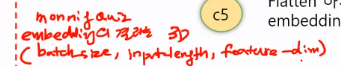
batch_size = sample
inputlength = maxlen

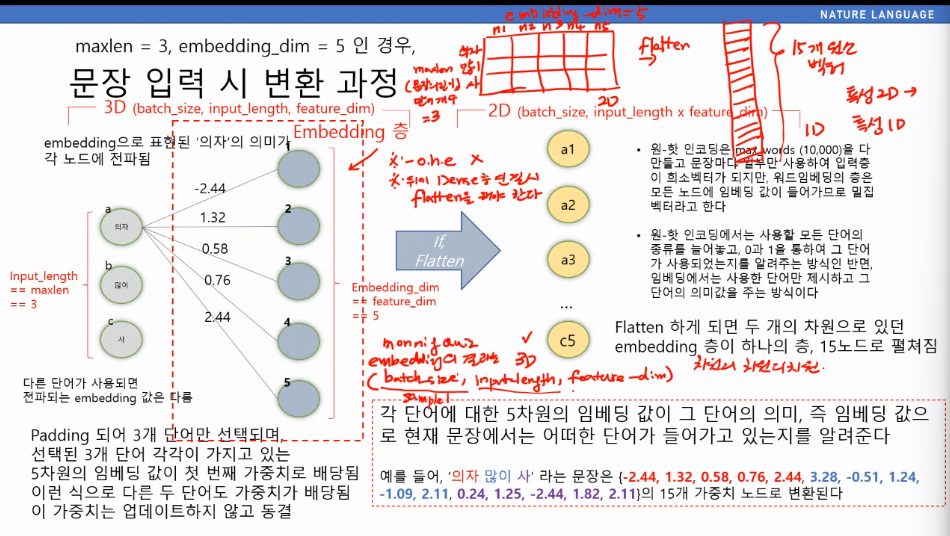

In [ ]:
# 8 ~ 30
# 소문자, 숫자, 특수문자 a-z 0-9 
# 3번 연속 문자 금지
# 몇번수정해야할지출력

import re
passwd=input()
result=True
if not 8<=len(passwd)<=30:
    result=False
if not re.findall('[a-z]', passwd):
    result=False
if not re.findall('[0-9]', passwd):
    result=False
if not re.findall('[`~!@#$%^&*(),<.>/?]+', passwd):
    result=False

result

False

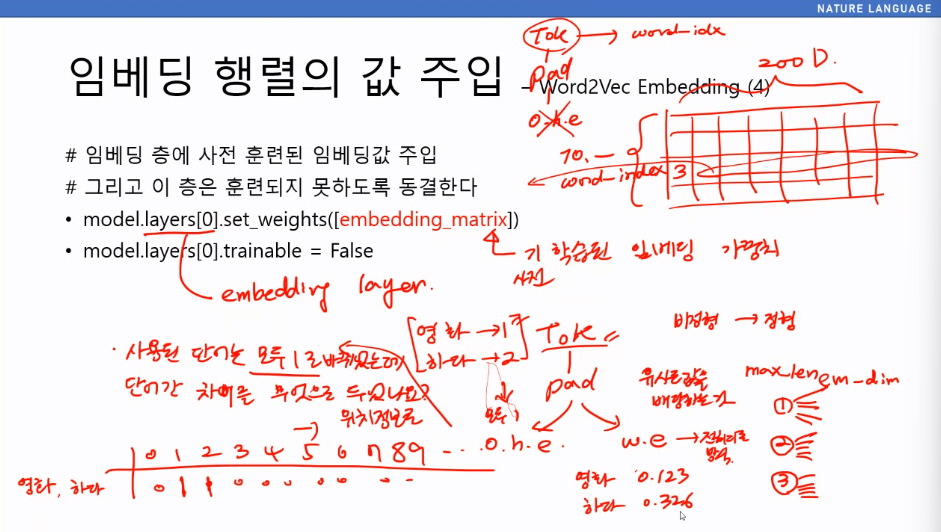

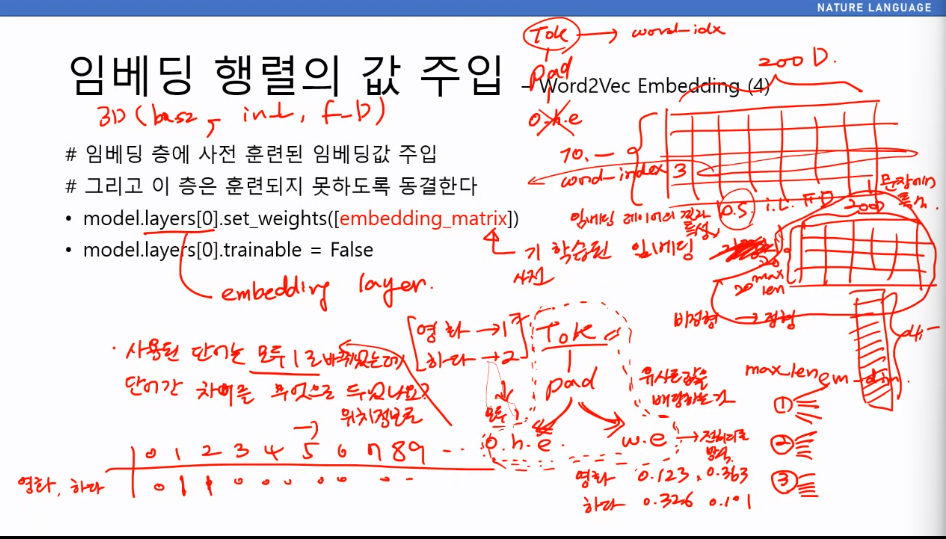

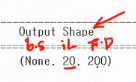

batch_size = sample

inputlength = maxlen

feature dim

In [51]:
loaded_model = model
loaded_tokenizer = tokenizer

In [45]:
data = loaded_tokennizer.texts_to_sequences(test_data_text)
data = pad_sequences(data, maxlen=maxlen)
x_test = data
y_test = np.asarray(test_data_senti).astype('float32')

In [48]:
test_eval= loaded_model.evaluate(x_test, y_test)

515/515 [==============================] - 2s 3ms/step - loss: 0.5746 - acc: 0.7819


In [50]:
print('prediction model loss & acc:', test_eval)

prediction model loss & acc: [0.5745622515678406, 0.7818877696990967]


In [52]:
text = ["재미있게 잘 봤습니다"]
import rhinoMorph
rn = rhinoMorph.startRhino()
text=[rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], xrVv=True,eomi=True) for sentence in text]
print('형태소분석결과:', text)
data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
# x_test= to_one_hot(data, dimension=max_words)
x_test= data
prediction = loaded_model.predict(x_test)
print("Result:", prediction)


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
형태소분석결과: [['재미있다', '잘', '보다']]
1/1 [==============================] - 0s 98ms/step
Result: [[0.96561074]]


In [67]:
def read_data(filename, encoding='cp949'):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:] 
    return data

data = read_data('c:\\pytest\\ratings_morphed.txt' , encoding='cp949')
print(type(data))
print(len(data))
print(len(data[0]))
print(data[0])

<class 'list'>
197559
3
['8132799', '디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전하다 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사하다', '1']


In [68]:
import random
import math
import numpy as np
random.shuffle(data)
part_num= math.floor(len(data) * 1/2)
data = data[:part_num]
print(len(data))

98779


In [69]:
data[0]

['3632512', '짜식 ㅋㅋ ㅋ 누나 가슴 두근대다 ㅋㅋ', '1']

In [70]:
from sklearn.model_selection import train_test_split
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(
    data_text, data_senti, stratify=data_senti)


In [71]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq:', train_data_senti_freq)
test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq:', test_data_senti_freq)


train_data_senti_freq: Counter({'1': 37069, '0': 37015})
test_data_senti_freq: Counter({'1': 12356, '0': 12339})


In [72]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import math
max_words = 10000
maxlen = 20
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index


In [73]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
# print('word_index: ', word_index)


전체에서 28203개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>


In [74]:
data = tokenizer.texts_to_sequences(train_data_text)
print('data 0:', data[0])
print('texts 0:', train_data_text[0])


data 0: [1130, 686, 1734, 55, 1734, 20, 323, 3]
texts 0: 헐리우드 팔다 클레멘타인 아 젠장할 클레멘타인 다 영화관 보다


In [75]:
data = pad_sequences(data, maxlen=maxlen)
print('data:', data)
print('data 0:', data[0])
print('data 0의길이:', len(data[0]))

data: [[   0    0    0 ...   20  323    3]
 [   0    0    0 ...   66   18  146]
 [   0    0    0 ...    0 2853 2853]
 ...
 [1762 4781    2 ...   47   14    1]
 [   0    0    0 ...    0    0  178]
 [   0    0    0 ...    1    6  118]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0 1130  686
 1734   55 1734   20  323    3]
data 0의길이: 20


In [76]:
labels = np.asarray(train_data_senti).astype('float32')

In [77]:
validation_ratio= 0.3
validation_len= math.floor(len(train_data_text) * validation_ratio)    
x_train= data[validation_len:]
y_train= labels[validation_len:]
x_val= data[:validation_len]
y_val= labels[:validation_len]

In [78]:
class_number= 1
epochs = 5
batch_size= 32
embedding_dim= 200
model_name= 'text_binary_model.h5'
tokenizer_name= 'text_binary_tokenizer.pickle'

In [79]:
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())

model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=class_number, activation='sigmoid'))


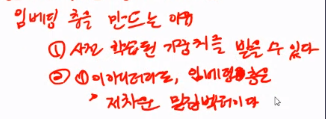

In [ ]:
#441페이지

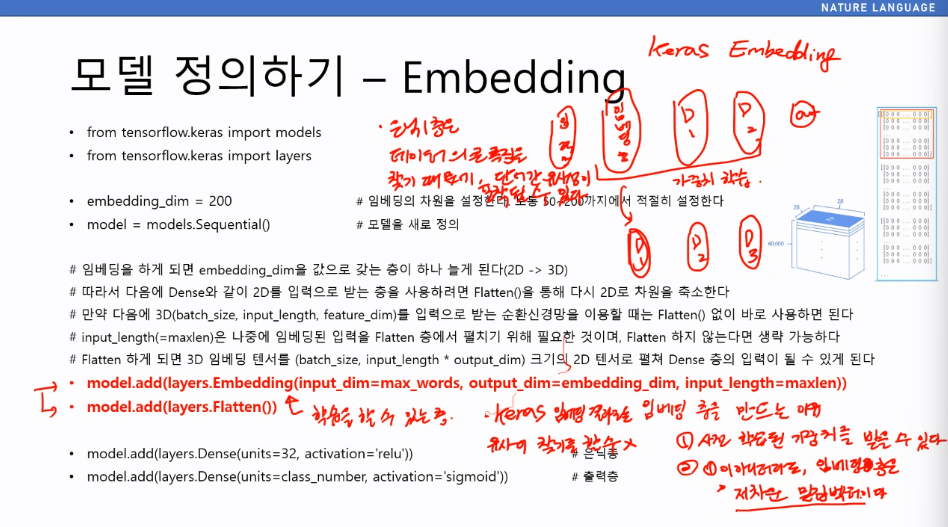

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 200)           2000000   
                                                                 
 flatten_1 (Flatten)         (None, 4000)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                256064    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,258,177
Trainable params: 2,258,177
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [82]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

Epoch 1/5
1621/1621 [==============================] - 31s 19ms/step - loss: 0.4307 - acc: 0.7976 - val_loss: 0.4015 - val_acc: 0.8192
Epoch 2/5
1621/1621 [==============================] - 30s 19ms/step - loss: 0.3448 - acc: 0.8519 - val_loss: 0.4082 - val_acc: 0.8185
Epoch 3/5
1621/1621 [==============================] - 31s 19ms/step - loss: 0.2769 - acc: 0.8862 - val_loss: 0.4615 - val_acc: 0.8056
Epoch 4/5
1621/1621 [==============================] - 30s 19ms/step - loss: 0.2266 - acc: 0.9101 - val_loss: 0.5270 - val_acc: 0.7936
Epoch 5/5
1621/1621 [==============================] - 30s 18ms/step - loss: 0.1916 - acc: 0.9256 - val_loss: 0.6232 - val_acc: 0.7897


In [83]:
loaded_model = model
loaded_tokenizer = tokenizer

In [84]:
data = loaded_tokenizer.texts_to_sequences(test_data_text)
data = pad_sequences(data, maxlen=maxlen)
x_test = data
y_test = np.asarray(test_data_senti).astype('float32')

In [85]:
test_eval= loaded_model.evaluate(x_test, y_test)

772/772 [==============================] - 2s 3ms/step - loss: 0.6157 - acc: 0.7934


In [86]:
print('prediction model loss & acc:', test_eval)

prediction model loss & acc: [0.6156613230705261, 0.7933589816093445]


In [87]:
text = ["재미있게 잘 봤습니다"]
import rhinoMorph
rn = rhinoMorph.startRhino()
text=[rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], xrVv=True,eomi=True) for sentence in text]
print('형태소분석결과:', text)
data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
# x_test= to_one_hot(data, dimension=max_words)
x_test= data
prediction = loaded_model.predict(x_test)
print("Result:", prediction)


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
형태소분석결과: [['재미있다', '잘', '보다']]
1/1 [==============================] - 0s 57ms/step
Result: [[0.9810666]]


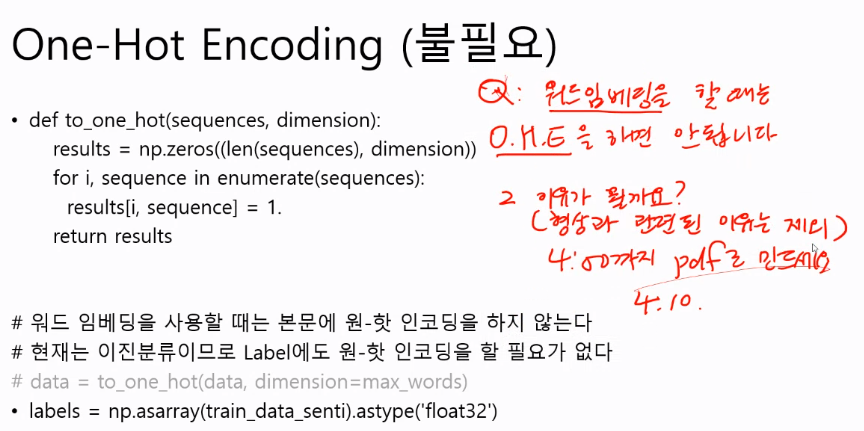

In [ ]:
# 원핫인코딩은 0과 하나의 1로 이루어진 matrix인데, 이것으로는 단어간 유사도를 표현할 수 없다.
# 각 단어의 유사도를 기록하려면 여러 칸이 필요한데 원핫인코딩을 하면 1개 빼고 모든 정보가 소실된다.

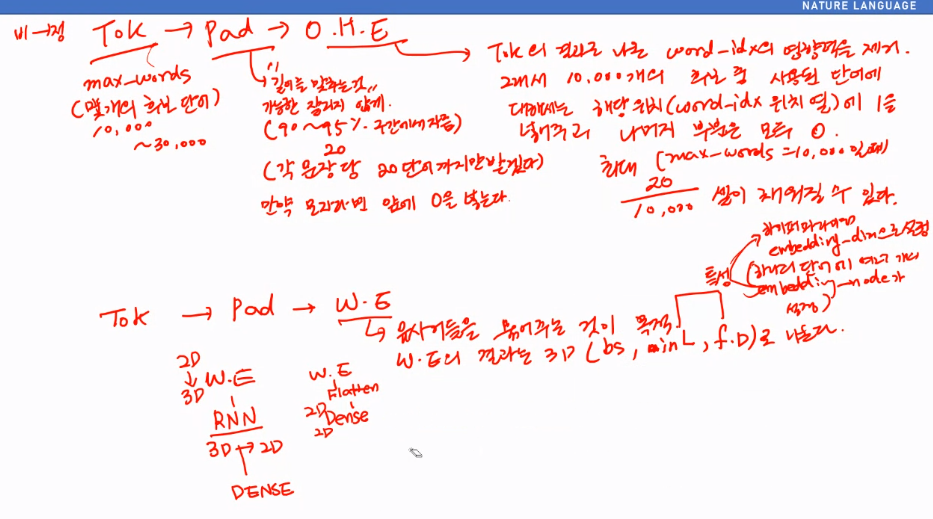

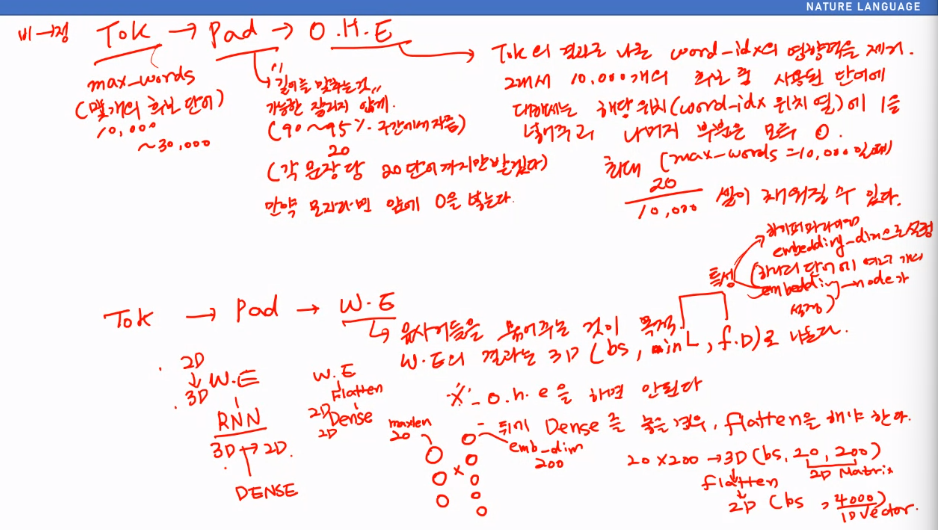

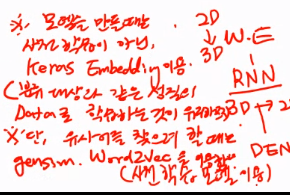